# Project: Data Gathering and Cleaning, and Visualizaton.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Data Assessment for Quality and Tidiness</a></li>
<li><a href="#clean">Data Cleaning for Quality and Tidiness</a></li>
<li><a href="#store">Data Storage</a></li>
<li><a href="#analysis">Data Analysis and Visualization (Brief)</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li> 
</ul>

<a id='intro'></a>
## Introduction
> This Project uses 3 datasets related to the the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with and makes funny comments about their dogs.
> Three data sources will be used: 
1. Enhanced Twitter Archive (of WeRateDogs), with 2356 observations.
2. Image Predictions File -generated after running the images of all the dogs through a neural network.
3. Additional Data via the Twitter API.

<a id='gather'></a>
## Data Gathering

In [221]:
#import the necessary libraries
import numpy as np
import pandas as pd
import requests
import json
import io
import datetime as dt
import os
import math
import functools as ft
#set printing options to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Import the Already Provided Enhanced Twitter Archive CSV file**

In [222]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
336,832636094638288896,NaN,NaN,2017-02-17 17:01:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Orion. He just got back from the denti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832636094...,12,10,Orion,None,None,None,None


**Import the `image_predictions.tsv` file using the `requests` and `io` libraries**

In [223]:
url_data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass')).content


In [224]:
#read tsv file
df_img = pd.read_csv(io.StringIO(url_data.decode('utf-8')), sep='\t')
df_img.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1215,743510151680958465,https://pbs.twimg.com/ext_tw_video_thumb/74350...,1,sea_lion,0.859046,False,tub,0.020405,False,hippopotamus,0.013095,False
367,672964561327235073,https://pbs.twimg.com/media/CVbZsouWUAIsxMc.jpg,1,Chihuahua,0.292343,True,pug,0.173364,True,French_bulldog,0.045507,True


**For the third dataset, gather Additional data from the Twitter API using `tweepy` if possible**
> I experienced delays in getting authenticated by Twitter. Therefore, I have placed that application on hold.
> I will use the `tweet_json.txt` file instead.

**Below is the code for importing data via tweepy obtained from Udacity's *twitter-api.py* file.**
- Note that I was unable to use it because I coulden't get Twitter's approval

`import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer`

*Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
 These are hidden to comply with Twitter's API terms and conditions*
 
`consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'`

`auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)`

*NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:*
- df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
- change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
 
*NOTE TO REVIEWER: this student had mobile verification issues so the following*
 
- Twitter API code was sent to this student from a Udacity instructor
- Tweet IDs for which to gather additional data via Twitter's API*

`tweet_ids = df_1.tweet_id.values
len(tweet_ids)`

*Query Twitter's API for JSON data for each tweet ID in the Twitter archive*
`count = 0
fails_dict = {}
start = timer()`

*Save each tweet's returned JSON as a new line in a .txt file*

`with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)`


In [225]:
#use Path from pathlib to get absolute path
# ensured that I had downloaded tweet-json.txt into project  folder 
from pathlib import Path
p_abs = Path().absolute()
p_abs = str(p_abs)

In [226]:
# downloaded tweet-json.txt; rename to tweet_json.json
if (os.path.exists(p_abs + '/tweet_json.json') != True):
    os.rename( p_abs + '/tweet-json.txt', p_abs + '/tweet_json.json')

In [227]:
# reading-in the json file
df_additional = pd.read_json('tweet_json.json', lines=True)
df_additional.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,8853,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<a id='assess'></a>
## Data Assessment for Quality and Tidiness

**Visual Assessment: We have three datasets now imported into the notebook.**
- I will now proceed with visually assessing each dataset to identify Quality and Tidiness Issues for each table

**1. The WeRateDogs twitter archive**

*A. Visual assessment of `df_archive` (the We Rate Dogs twitter archive) dataframe using pandas and a spreadsheet.*

In [228]:
# Viewing a sample in pandas (I also viewed dataset in a Spreadsheet):
df_archive.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
949,752309394570878976,NaN,NaN,2016-07-11 01:11:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,None,None,None,None
851,765669560888528897,NaN,NaN,2016-08-16 22:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tove. She's a Balsamic Poinsetter. Sur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765669560...,12,10,Tove,None,None,None,None
299,836989968035819520,NaN,NaN,2017-03-01 17:22:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mookie. He really enjoys shopping but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836989968...,12,10,Mookie,None,None,None,None


**Quality Issues**

1. Multiple abnormally high rating numerators.
2. Multiple abnormally high rating denominators.
3. Some dog names are inaccurate.
4. Many missing values accross `in_reply_to_status_id`,	`in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id` and	`retweeted_status_timestamp` columns.


**Tidiness Issues**
??

*B. Programmatic assessment of `df_archive` (the We Rate Dogs twitter archive) dataframe using `pandas.info`, `pandas.describe`, etc.*

In [229]:
#assessment using pandas.info
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- multiple null values in the `in_reply_to_status_id`,	`in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id` and	`retweeted_status_timestamp` columns is confirmed.
- The datatype of `timestamp` column should be 'datetime' and not 'object'.
- tweet_id should be a str datatype.
- The missing values accross many columns `in_reply_to_status_id`,	`in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id`, `retweeted_status_timestamp`, `doggo`, `floofer`,	`pupper` and `puppo` columns    are falsely 'non-null'because of the 'NANs'.

In [230]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


```**Updated**```
**Quality Issues**

1. Multiple abnormally high rating numerators.
2. Multiple abnormally high rating denominators.
3. Some dog names are inaccurate.
4. The datatype of `timestamp` column should be 'datetime' and not 'object'
5. The missing values accross many columns `in_reply_to_status_id`,	`in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id`, `retweeted_status_timestamp`, `doggo`, `floofer`,	`pupper` and `puppo` columns    are falsely 'non-null' because of the 'NANs'
6. `tweet_id` column should be a str datatype.
7. Many missing values accross `in_reply_to_status_id`,	`in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id` and	`retweeted_status_timestamp` columns.

**Tidiness Issues**


1. ??


**2. The Image Predictions File Dataframe `df_img`.**

*A. Visual assessment of `df_img` (the image-predictions dataset) dataframe using pandas and a spreadsheet.*

In [231]:
# Viewing a sample in pandas (I also viewed dataset in a Spreadsheet):
df_img.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
970,706538006853918722,https://pbs.twimg.com/media/Cc4gjxqW4AIoThO.jpg,1,chow,0.541794,True,Pembroke,0.094918,True,Pomeranian,0.085439,True
1988,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,3,pug,0.999120,True,French_bulldog,0.000552,True,bull_mastiff,0.000073,True
1649,809084759137812480,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True
330,672095186491711488,https://pbs.twimg.com/media/CVPDAR9XIAAm8QB.jpg,1,pug,0.794087,True,French_bulldog,0.140796,True,bull_mastiff,0.044681,True


**Quality Issues**

1. The `p1`, `p2`, and	`p3` column dog names contain some words that are not dog breeds



**Tidiness Issues**

1. The `p1`,`p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`,	`p3`, `p3_conf` and	`p3_dog` column names are not very descriptive.
2. Provided testing the accuracy of the neural network is not a concern for me, three columns only are relevant in this dataset: `tweet_id`, `jpg_url`, and the 'dog_breed', a new column that I will melt the p- columns into


*B. Programmatic assessment of `df_img` (the image-predictions dataset) dataframe using `pandas.info`, `pandas.describe`, etc.*

In [232]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- tweet_id should be a str datatype.

In [233]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


**```updated```**

**Quality Issues**

1. The `p1`, `p2`, and	`p3` column dog names contain some words that are not dog breeds



**Tidiness Issues**

1. The `p1`,`p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`,	`p3`, `p3_conf` and	`p3_dog` column names are not very descriptive.
2. Provided testing the accuracy of the neural network is not a concern for me, three columns only are relevant in this dataset: `tweet_id`, `jpg_url`, and the 'dog_breed', a new column that I will melt the p- columns into.
3. `tweet_id` should be a str datatype.


**3. The additional Twitter data dataframe.**

*A. Visual assessment of `df_additional` (the additional twitter data) dataframe using pandas, a text-editor, and a spreadsheet.*

In [234]:
df_additional.sample(4)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
271,2017-03-12 03:07:56+00:00,840761248237133825,840761248237133824,RT @dog_rates: Say hello to Maddie and Gunner....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,1972,0,False,False,NaN,NaN,en,{'created_at': 'Sat Mar 11 18:35:42 +0000 2017...,NaN,NaN,NaN
1608,2016-01-08 18:43:29+00:00,685532292383666176,685532292383666176,"For the last time, WE. DO. NOT. RATE. BULBASAU...",False,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 685532287132430340, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,1298,3336,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1419,2016-02-12 17:22:12+00:00,698195409219559425,698195409219559424,Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 698195403653705729, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,6750,18408,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1937,2015-12-07 15:32:42+00:00,673887867907739649,673887867907739648,When you're having a great time sleeping and y...,False,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673887841718394880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,274,994,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


**Quality Issues**

1. 



**Tidiness Issues**

1. Several columns are nested.
2. Some columns are not needed e.g id and id_str are almost one and the same. 



*B. Programmatic assessment of `df_additional` (the dataset containing additional data on the tweets) dataframe using `pandas.info`, `pandas.describe`, etc.*

In [235]:
#df.info()
df_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

**Tidiness**
- several columns have numerous missing values and should be dropped

In [236]:
df_additional.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [237]:
df_additional.lang.value_counts()

en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

**Tidiness**
- An overwhelming majority of the tweet languages is in english, calling the usefulness of this column into question.

In [238]:
df_additional.truncated.value_counts()

False    2354
Name: truncated, dtype: int64

**Tidiness**
- All the values in `truncated` column are `False`. The usefulness of this column in my analysis is doubtful.

In [239]:
df_additional.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [240]:
df_additional.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

- *Nested Column*

In [241]:
df_additional.favorited.value_counts()

False    2346
True        8
Name: favorited, dtype: int64

**```updated```**
**Quality Issues**

- ?



**Tidiness Issues**

1. Several columns are nested.
2. Some columns are not needed e.g id and id_str are almost one and the same. 
3. An overwhelming majority of the tweet languages is in english, calling the usefulness of this column into question.


### CONCLUSION: DATA  ASSESSMENT ``updated``:

**TIDINESS:**
1. The three datasets should be merged into one tidy dataset; 6. `id_str` column name does not coincide with `tweet_id` of other datasets and should be renamed.
2. Duplicate columns:'tweet_id' and its equivalent 'int' and id_ columns in the master dataset., 'created_at' vs 'timestamp' columns. DROP ALL DUPLICATES.
3. The 'puppo', 'pupper', 'floofer' and 'doggo' columns all contain same type of data on 'dog stages'. 
4. Several columns are nested.
5. An overwhelming majority of the tweet languages is in english, calling the usefulness of this column into question.
6. Modify 'display_text_range' in  to show only number of characters in int



**QUALITY:**
5. Some columns are not needed e.g id and id_str are almost one and the same. 
- **The WeRateDogs twitter archive `df_archive`**

1. Multiple abnormally high rating numerators.
2. Multiple abnormally high rating denominators.
3. Inadequate datatypes: The datatype of `timestamp` column should be 'datetime' and not 'object';
`tweet_id` column should be a str datatype.
4. Many missing values accross `in_reply_to_status_id`,	`in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id` and	`retweeted_status_timestamp` columns.
5. Inaccurate dog breed names.
6. duplicate `tweet_id` in both int and str datatypes.

- **The Images Predictions dataset `df_img`**

1. duplicate `tweet_id` in both int and str datatypes.
2. Inaccurate dog prediction names.
3. The missing values accross many columns `in_reply_to_status_id`,	`in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id`, `retweeted_status_timestamp`, `doggo`, `floofer`,	`pupper` and `puppo` columns    are falsely 'non-null' because of the 'NANs'


- **The Additional data dataset `df_additional`**
1. ?

<a id='clean'></a>
## Data Cleaning for Quality and Tidiness

In [242]:
# Creating copies of the datasets
df_archive_copy = df_archive.copy()
df_img_copy = df_img.copy()
df_additional_copy = df_additional.copy()

### Clean : 
**The WeRateDogs twitter archive  `df_archive_copy`:**
1. Collapse 'floofer', 'doggo', 'puppo' and 'pupper' columns into one 'dog_stages' column
2. Drop columns with majority null values
3. Modify Source column data by extracting the twitter client type.

#### Define:
1. Collapse 'floofer', 'doggo', 'puppo' and 'pupper' columns into one 'dog_stages' column

#### Code:

In [243]:
#first replace all 'None' values with ''
df_archive_copy.replace('None', '', inplace=True)
dog_stages_list = ['puppo', 'floofer', 'doggo','pupper']
# then create dog_stages column with empty strings
df_archive_copy['dog_stages'] = ''
for stage in dog_stages_list:
    df_archive_copy['dog_stages'] = df_archive_copy[stage] + ',' + df_archive_copy['dog_stages']

#remove all double commas
df_archive_copy['dog_stages'] = df_archive_copy['dog_stages'].str.replace(",,", '')
#remove only the leading commas
df_archive_copy['dog_stages'] = df_archive_copy['dog_stages'].apply(lambda x: x[1:] if x.startswith(',') else x)
#remove only the trailing commas
df_archive_copy['dog_stages'] = df_archive_copy['dog_stages'].apply(lambda x: x[:len(x)-1] if x.endswith(',') else x)

In [244]:
df_archive_copy['dog_stages'].value_counts()

                 1976
pupper            245
doggo              83
puppo              29
pupper,doggo       12
floofer             9
doggopuppo          1
doggo,floofer       1
Name: dog_stages, dtype: int64

#### Define:
1. Drop columns with majority null values, including columns in the 'dog_stages_list' variable.

#### Code

In [245]:
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', *dog_stages_list]
df_archive_copy.drop(columns=columns_to_drop, inplace=True)

#### Test

In [246]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   dog_stages          2356 non-null   object
dtypes: int64(3), object(6)
memory usage: 165.8+ KB


#### Define:
2. Modify Source values by changing them to twitter client type.

#### Code

In [247]:
df_archive_copy['source'] = df_archive_copy.source.str.extract('<a href="http:\/\/.+>(.+)<\/a>')

#### Test

In [248]:
df_archive_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
Name: source, dtype: int64

**`The Images Predictions dataset` :** 
1. Provided testing the accuracy of the neural network is not a concern for me, three columns only are relevant in this dataset: `tweet_id`, `jpg_url`, and the 'dog_breed', a new column that I will melt the p- columns into.
> The related quality issue: Inaccurate dog names will be largely solved also.

##### Define:
- Create New Column `dog_breeds` and add p1 if it is a true dog breed, else add p2 if it is actually a dog, else add p3 if it is a dog breed, else add 'None'.
- Drop other columns apart from `dog_breeds`, `jpg_url`, `tweet_id`, and `img_num`


In [249]:
df_img_copy.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1850,840268004936019968,https://pbs.twimg.com/media/C6k7SaEXUAg83_J.jpg,3,Chesapeake_Bay_retriever,0.863987,True,Labrador_retriever,0.052632,True,kelpie,0.032574,True
1752,824325613288833024,https://pbs.twimg.com/media/C3CXxaoWQAAiLuC.jpg,1,Pembroke,0.990793,True,Cardigan,0.008919,True,basenji,0.000262,True
40,666691418707132416,https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg,1,German_shepherd,0.975401,True,beagle,0.008687,True,bloodhound,0.005394,True
1379,764857477905154048,https://pbs.twimg.com/media/Cp1R0ZTWcAAaPO4.jpg,1,Bernese_mountain_dog,0.792059,True,Appenzeller,0.155034,True,EntleBucher,0.038374,True
1662,811985624773361665,https://pbs.twimg.com/media/C0TAnZIUAAAADKs.jpg,1,Staffordshire_bullterrier,0.610573,True,French_bulldog,0.159935,True,doormat,0.058672,False


##### Code

In [250]:
# check whether p1 is actually a dog breed and if so, add p1 into dog breed column
#if p1 is not dog breed, check if p2 is a dog breed, if p2 is a dog breed, add into dog breed column
# if p2 is not a dog breed, check if p3 is a dog breed, and add p3 into new column 'dog_breed'.
# else, add 'None'

In [251]:
# find and import a csv file containing true dog breeds
official_breeds = requests.get('https://raw.githubusercontent.com/paiv/fci-breeds/main/fci-breeds.csv',auth=('user', 'pass')).content
official_breeds = pd.read_csv(io.StringIO(official_breeds.decode('utf-8')), sep=',')
official_breeds = official_breeds['name'].str.lower().tolist()
official_breeds[:4]

['english pointer', 'english setter', 'kerry blue terrier', 'cairn terrier']

In [252]:
#2nd csv file
official_breeds2 = requests.get('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/dog_breed.csv',auth=('user', 'pass')).content
official_breeds2 = pd.read_csv(io.StringIO(official_breeds2.decode('utf-8')), sep=',')
official_breeds2 = official_breeds2['breed'].str.lower().tolist()
official_breeds2[:4]

['affenpinscher', 'afghan hound', 'airedale terrier', 'akita']

In [253]:
#3rd  csv file
official_breeds3 = requests.get('https://raw.githubusercontent.com/tmfilho/akcdata/master/data/akc-data-latest.csv',auth=('user', 'pass')).content
official_breeds3 = pd.read_csv(io.StringIO(official_breeds3.decode('utf-8')), sep=',')
official_breeds3 = official_breeds3['Unnamed: 0'].str.lower().tolist()
official_breeds3[:4]

['affenpinscher', 'afghan hound', 'airedale terrier', 'akita']

In [254]:
#combine dog lists
official_breeds = [*official_breeds, *official_breeds2, *official_breeds3, 'african hunting dog','golden retriever','pembroke','japanese spaniel', 'boston bull', 'staffordshire bullterrier', 'llhasa','blenheim spaniel', 'malamute', 'shih-tzu', 'terrier', 'hound', 'pekinese', 'dobberman','dandie dinmont','blenheim spaniel', 'whippet', 'chow','eskimo dog', 'appenzeller','maltese dog', 'malinois', 'airedale', 'toy poodle', 'pembroke','kelpie', 'soft coated wheaten terrier', 'german short haired pointer','brabancon griffon	','bull mastiff','standard poodle', 'english springer','basset']

In [255]:
#create a function to replace the '_' in the dog breed names in our img_dataframe with ' ' 
# and to convert the names to all lowercase
def replace_tolower(breedname):
    breedname = breedname.replace('_', ' ')
    return breedname.lower()
    

In [256]:
# create list with correct breed names that will be appended to the dataset
#redbone is not in the official list and 'german shepherd' 
#is designated 'german shepherd dog' in the official list, hence the mismatch
def create_authentic_list(dataframe = df_img_copy):
   # breed_names_not_in_official_list[]
    dog_breed_list = []
    for n in range(len(df_img_copy)):
        condition_1 = replace_tolower(df_img_copy['p1'][n]) in official_breeds 
        condition_2 = replace_tolower(df_img_copy['p2'][n]) in official_breeds 
        condition_3 = replace_tolower(df_img_copy['p3'][n]) in official_breeds 
        if df_img_copy['p1'][n] == 'German_shepherd' or df_img_copy['p1'][n] == 'redbone':
            dog_breed_list.append(replace_tolower(df_img_copy['p1'][n]))
        elif df_img_copy['p2'][n] == 'German_shepherd' or df_img_copy['p2'][n] == 'redbone':
            dog_breed_list.append(replace_tolower(df_img_copy['p1'][n]))
        elif df_img_copy['p3'][n] == 'German_shepherd' or df_img_copy['p3'][n] == 'redbone':
            dog_breed_list.append(replace_tolower(df_img_copy['p1'][n]))
        elif condition_1 == True:
            dog_breed_list.append(replace_tolower(df_img_copy['p1'][n]))
        elif condition_1 == False and condition_2 == True:
            dog_breed_list.append(replace_tolower(df_img_copy['p2'][n]))
        elif condition_2 == False and condition_3 == True:
            dog_breed_list.append(replace_tolower(df_img_copy['p3'][n]))
        
        else:
            dog_breed_list.append('None')
    return dog_breed_list

In [257]:
# create column dog_breeds
dog_breed_list = create_authentic_list()
df_img_copy['dog_breeds'] = dog_breed_list

In [258]:
#test accuracy
df_img_copy[['p1', 'p2', 'p3', 'dog_breeds']]

,p1,p2,p3,dog_breeds
0,Welsh_springer_spaniel,collie,Shetland_sheepdog,welsh springer spaniel
1,redbone,miniature_pinscher,Rhodesian_ridgeback,redbone
2,German_shepherd,malinois,bloodhound,german shepherd
3,Rhodesian_ridgeback,redbone,miniature_pinscher,rhodesian ridgeback
4,miniature_pinscher,Rottweiler,Doberman,miniature pinscher
5,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog,bernese mountain dog
6,box_turtle,mud_turtle,terrapin,None
7,chow,Tibetan_mastiff,fur_coat,chow
8,shopping_cart,shopping_basket,golden_retriever,golden retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier,komondor


In [259]:
len(dog_breed_list)

2075

In [260]:
#Drop 'p1', 'p1_conf','p1_dog','p2','p2_conf','p2_dog','p3', 'p3_conf', 'p3_dog' columns
remove_columns = ['p1', 'p1_conf','p1_dog','p2','p2_conf','p2_dog','p3', 'p3_conf', 'p3_dog']
df_img_copy.drop(columns=remove_columns, inplace=True)

 ##### Test   

In [261]:
df_img_copy.dog_breeds.value_counts()

None                              334
golden retriever                  173
labrador retriever                114
pembroke                          105
chihuahua                          98
pug                                65
toy poodle                         58
chow                               51
samoyed                            46
pomeranian                         42
cocker spaniel                     38
malamute                           34
french bulldog                     32
miniature pinscher                 31
chesapeake bay retriever           31
staffordshire bullterrier          24
lakeland terrier                   24
beagle                             24
shih-tzu                           24
shetland sheepdog                  22
eskimo dog                         22
siberian husky                     21
german shepherd                    20
rottweiler                         20
maltese dog                        19
kuvasz                             19
basset      

In [262]:
# test the new df_img_copy dataframe
df_img_copy.sample(3)

,tweet_id,jpg_url,img_num,dog_breeds
437,674416750885273600,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1,chihuahua
2047,886736880519319552,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1,kuvasz
237,670433248821026816,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,1,giant schnauzer


### Clean [Tidiness]: : 
**`The Additional data dataset df_additional`:** 

#### Define

Drop the following columns: 
1. all nested Columns.
2. Other columns containing information that are not relevant to my project.
3. id(int) column as it is a duplicatiom. 
4. 'lang' column as most tweets are in English anyway.

#### Code

In [263]:
df_additional_copy.sample()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1223,2016-03-27 17:25:54+00:00,714141408463036416,714141408463036416,"I know we only rate dogs, but since it's Easte...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 714141403652231168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,1569,4673,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [264]:
#firstly drop nested tables except place
columns_to_drop = [ 'entities', 'extended_entities', 'user', 'quoted_status']
df_additional_copy.drop(columns=columns_to_drop, inplace=True)
df_additional_copy.sample()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str
1065,2016-06-08 22:48:46+00:00,740676976021798912,740676976021798912,"Meet Baloo. He's expecting a fast ground ball,...",False,"[0, 115]","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,False,7724,19881,False,False,0.0,0.0,en,NaN,NaN,NaN


In [265]:
# secondly, Drop columns containing information that are not relevant to my project
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_status_id_str', 'source','truncated', 'retweeted', 'favorited', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'retweeted_status', 'quoted_status_id_str', 'possibly_sensitive','in_reply_to_screen_name', 'geo','coordinates', 'place','contributors','is_quote_status', 'possibly_sensitive_appealable', 'quoted_status_id', 'is_quote_status']
df_additional_copy.drop(columns=columns_to_drop, inplace=True)


In [266]:
#thirdly drop id, lang and created_at
df_additional_copy.drop(columns=['lang', 'id', 'created_at'], inplace=True)


#### Test

In [267]:
df_additional_copy.sample()

,id_str,full_text,display_text_range,retweet_count,favorite_count
2211,668567822092664832,This is Marvin. He can tie a bow tie better th...,"[0, 82]",62,265


#### Define:
- Rename `id_str` to 'tweet_id'

#### Code:

In [268]:
df_additional_copy.rename(columns={'id_str': 'tweet_id'}, inplace=True)
#convert to str
df_additional_copy['tweet_id'] = df_additional_copy.tweet_id.astype('str')

#### Test

In [269]:
df_additional_copy.sample()

,tweet_id,full_text,display_text_range,retweet_count,favorite_count
1409,698989035503689728,This is Oliver. He does toe touches in his sle...,"[0, 91]",1113,3701


### Clean [Quality]: 
- **The WeRateDogs twitter archive `df_archive`** :
1. Multiple abnormally high rating numerators.
2. Multiple abnormally high rating denominators. -*common denominator is 10*

3. The datatype of `timestamp` column should be 'datetime' and not 'object'
4. `tweet_id` column should be a str datatype.
5. Many missing values accross `in_reply_to_status_id`,	`in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id` and	`retweeted_status_timestamp` columns. - **solved**
5. The missing values accross many columns `in_reply_to_status_id`,	`in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id`, `retweeted_status_timestamp`, `doggo`, `floofer`,	`pupper` and `puppo` columns    are falsely 'non-null' because of the 'NANs'


In [270]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2345 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   dog_stages          2356 non-null   object
dtypes: int64(3), object(6)
memory usage: 165.8+ KB


#### Define: 
1. Clean up all abnormally high 'rating numerators' and replace with mean

#### Code:

In [271]:
# first calculate the mean ratings
mean = math.floor(sum(df_archive_copy.rating_numerator)/2356)
# define a function 'replace_rate'
def replace_rate(x, mean):
    if x > 15:
        x = mean
    return x

In [272]:
# replace all ratings > 15 with 'mean'; use the func 'replace_rate'
df_archive_copy['rating_numerator'] = df_archive_copy.rating_numerator.apply(lambda x: replace_rate(x, mean))

#### Test

In [273]:
df_archive_copy.rating_numerator.value_counts()

12    558
11    464
10    461
13    377
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
1       9
2       9
15      2
0       2
Name: rating_numerator, dtype: int64

#### Define: 
2. Set all 'denominators' values to 10

#### Code

In [274]:
df_archive_copy['rating_denominator'] = df_archive_copy['rating_denominator'].apply(lambda x:10)

#### Test

In [275]:
df_archive_copy.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

#### Define: 
3. Convert data type of 'timestamp' form str to datetime

#### Code:

In [276]:
df_archive_copy['timestamp'] = pd.to_datetime(df_archive_copy['timestamp'])

#### Test

In [277]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2345 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   dog_stages          2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 165.8+ KB


#### Define:
4. Convert tweet_id datatype to str

#### Code:

In [278]:
df_archive_copy['tweet_id'] = df_archive_copy.tweet_id.astype('str')

#### Test:

In [279]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2345 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   dog_stages          2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 165.8+ KB


#### Define: 
5. The missing values accross many columns `in_reply_to_status_id`,	`in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id`, `retweeted_status_timestamp`, `doggo`, `floofer`,	`pupper` and `puppo` columns    are falsely 'non-null' because of the 'NANs'

#### Code:

In [280]:
df_archive_copy.replace('NaN ', np.NaN, inplace=True)

#### Test

In [281]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2345 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   dog_stages          2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 165.8+ KB


### Clean [Quality]: 
- **The Images Predictions dataset `df_img`**

1. The `p1`, `p2`, and	`p3` column dog names contain some words that are not dog breeds.**-solved by creating dog_breeds column that contains actual dog breeds from the predictions columns where applicable**
2. tweet_id should be str datatype

#### Code:

In [282]:
df_img_copy['tweet_id'] = df_img_copy['tweet_id'].astype('str')

#### Test

In [283]:
df_img_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    2075 non-null   object
 1   jpg_url     2075 non-null   object
 2   img_num     2075 non-null   int64 
 3   dog_breeds  2075 non-null   object
dtypes: int64(1), object(3)
memory usage: 65.0+ KB


### DEFINE: Merge All Three Datasets with outer join

### CODE:

In [284]:
#create a master df list
master_ls = [df_archive_copy, df_img_copy, df_additional_copy]


In [285]:
#merge all 3 at once with func tools
df_master = ft.reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), master_ls)


In [286]:
#drop 'full_text' column as it is a duplicate of 'text' column
df_master.drop(columns='full_text', inplace=True)

In [287]:
#rename 'display_text_range' column to 'length_of_text'
df_master.rename(columns={'display_text_range': 'length_of_text'}, inplace=True)

### TEST

In [288]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 0 to 1348
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1349 non-null   object             
 1   timestamp           1349 non-null   datetime64[ns, UTC]
 2   source              1340 non-null   object             
 3   text                1349 non-null   object             
 4   expanded_urls       1349 non-null   object             
 5   rating_numerator    1349 non-null   int64              
 6   rating_denominator  1349 non-null   int64              
 7   name                1349 non-null   object             
 8   dog_stages          1349 non-null   object             
 9   jpg_url             1349 non-null   object             
 10  img_num             1349 non-null   int64              
 11  dog_breeds          1349 non-null   object             
 12  length_of_text      1349 non-null 

In [289]:
df_master.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,dog_breeds,length_of_text,retweet_count,favorite_count
511,747816857231626240,2016-06-28 15:40:07+00:00,Twitter for iPhone,Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,a,,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,pembroke,"[0, 114]",1316,5346
1264,668221241640230912,2015-11-22 00:15:33+00:00,Twitter for iPhone,These two dogs are Bo &amp; Smittens. Smittens...,https://twitter.com/dog_rates/status/668221241...,10,10,,,https://pbs.twimg.com/media/CUX_rAyWsAYZOQ5.jpg,1,chow,"[0, 143]",215,537


<a id='store'></a>
## Data Storage

In [290]:
#store in 'twitter_archive_master'.csv
df_master.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

<a id='analysis'></a>
## Data Analysis and Visualization (Brief)

### INTRODUCTION:
> This dataset provides data on over a thousand tweets concerning people's dogs, the length of the tweets, the retweet count, the dog breeds, links to the images, etc
> This Project aims to answer the following research questions:
> 1. Which dog breeds were owned the most? 
> 2. How did dog ratings vary among different breeds?
> 3. Was there any difference in dog ratings based on dog owners' Twitter client?
> 4. How did the dog ratings vary with the passsage of time?
> 5. Were dogs that had other dogs nearby i.e doggo, puppo, floofer and pupper more likely to be rated higher?
> 6. How did favorite count vary with retweet count among dog breeds and ratings?


### Importing other Necessary Libraries and csv file

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
master_df = pd.read_csv('twitter_archive_master.csv')

### General Properties

In [292]:
master_df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,dog_breeds,length_of_text,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,"[0, 121]",4328,25461
1,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador retriever,"[0, 79]",8964,42908
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,"[0, 138]",9774,41048


In [293]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1349 non-null   int64 
 1   timestamp           1349 non-null   object
 2   source              1340 non-null   object
 3   text                1349 non-null   object
 4   expanded_urls       1349 non-null   object
 5   rating_numerator    1349 non-null   int64 
 6   rating_denominator  1349 non-null   int64 
 7   name                957 non-null    object
 8   dog_stages          212 non-null    object
 9   jpg_url             1349 non-null   object
 10  img_num             1349 non-null   int64 
 11  dog_breeds          1349 non-null   object
 12  length_of_text      1349 non-null   object
 13  retweet_count       1349 non-null   int64 
 14  favorite_count      1349 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 158.2+ KB


> There are 1349 observations of dog tweets in this dataset 

In [294]:
master_df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1.349000e+03,1349.000000,1349.0,1349.000000,1349.000000,1349.000000
mean,7.351918e+17,10.549296,10.0,1.186805,2817.897702,8052.873239
std,6.674487e+16,2.167670,0.0,0.538520,4609.894685,11078.583180
min,6.660293e+17,1.000000,10.0,1.000000,16.000000,0.000000
25%,6.753544e+17,10.000000,10.0,1.000000,610.000000,1532.000000
50%,7.084699e+17,11.000000,10.0,1.000000,1343.000000,3736.000000
75%,7.851709e+17,12.000000,10.0,1.000000,3316.000000,10132.000000
max,8.918152e+17,15.000000,10.0,4.000000,56625.000000,107015.000000


**General Insights**:
- Mean rating is above 10, maximum rating is 15, and most dogs were rated between 10 to 12
- The maximum favorite count is 107,015, far above the mean favorite count, and most dog tweets got marked as favorite tweets between approximately 1500 to 10000 times.
- The above observation holds true for the retweet counts, only differing in bare figures
- Average length of tweets is about 94 characters, however soome tweets were more than 130 characters long.

In [295]:
#Checking for duplicated rows
master_df.duplicated().value_counts()

False    1349
dtype: int64

> There are no duplicate observations

<a id='eda'></a>
## Exploratory Data Analysis and Visualization:



### 1. Which dog breeds were owned the most? 

In [296]:
# create a datasert grouping dog breeds by their number
# first visual
dog_breeds_counts = master_df.dog_breeds.value_counts().rename_axis('dog_breeds').reset_index(name='counts')
dog_breeds_counts.head()

,dog_breeds,counts
0,None,216
1,golden retriever,120
2,pembroke,77
3,labrador retriever,71
4,chihuahua,61


In [297]:
#216 dog images were not identified in this dataset
#remove 'none' dog breeds row from dog_breeds_counts
dog_breeds_counts.drop(labels=0, axis=0, inplace=True)
dog_breeds_counts.head()

,dog_breeds,counts
1,golden retriever,120
2,pembroke,77
3,labrador retriever,71
4,chihuahua,61
5,pug,46


In [298]:
#there are 98 dog breeds
dog_breeds_counts.dog_breeds.count()

98

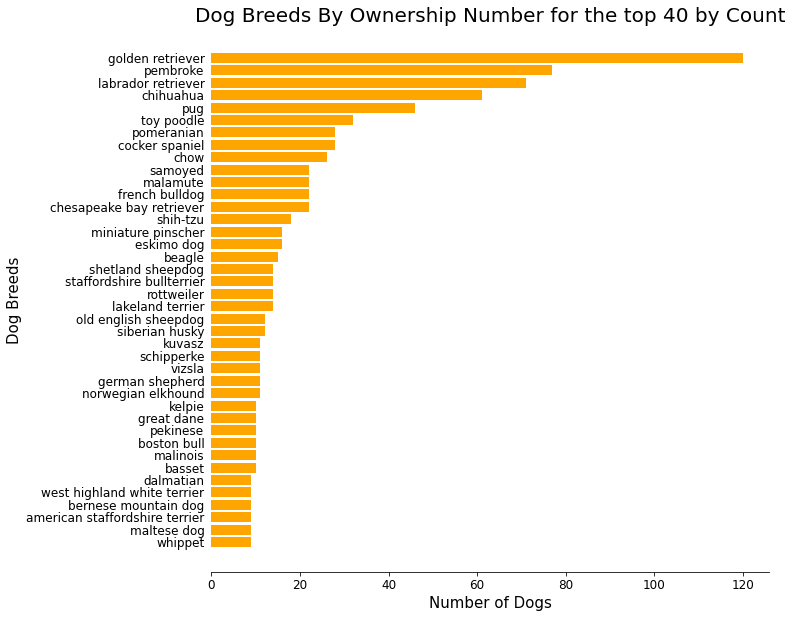

In [299]:
#plot dog_breeds by count in a horizontal bar plot for first 40 highest counts
plt.figure(figsize=(10, 10))
plt.barh(dog_breeds_counts['dog_breeds'][:40], dog_breeds_counts['counts'][:40],color='orange')
plt.gca().invert_yaxis()
plt.title('Dog Breeds By Ownership Number for the top 40 by Count', fontsize=20)
plt.xlabel('Number of Dogs', fontsize = 15)
plt.ylabel('Dog Breeds', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, None)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()

> The **golden retriever** is by far the most 'owned' dog (count=120) in this list. Other dogs in the first 10 include:

2.	pembroke	77
3.	labrador retriever	71
4.	chihuahua	61
5.	pug	46
6.	toy poodle	32
7.	pomeranian	28
8.	cocker spaniel	28
9.	chow	26
10.	samoyed  22

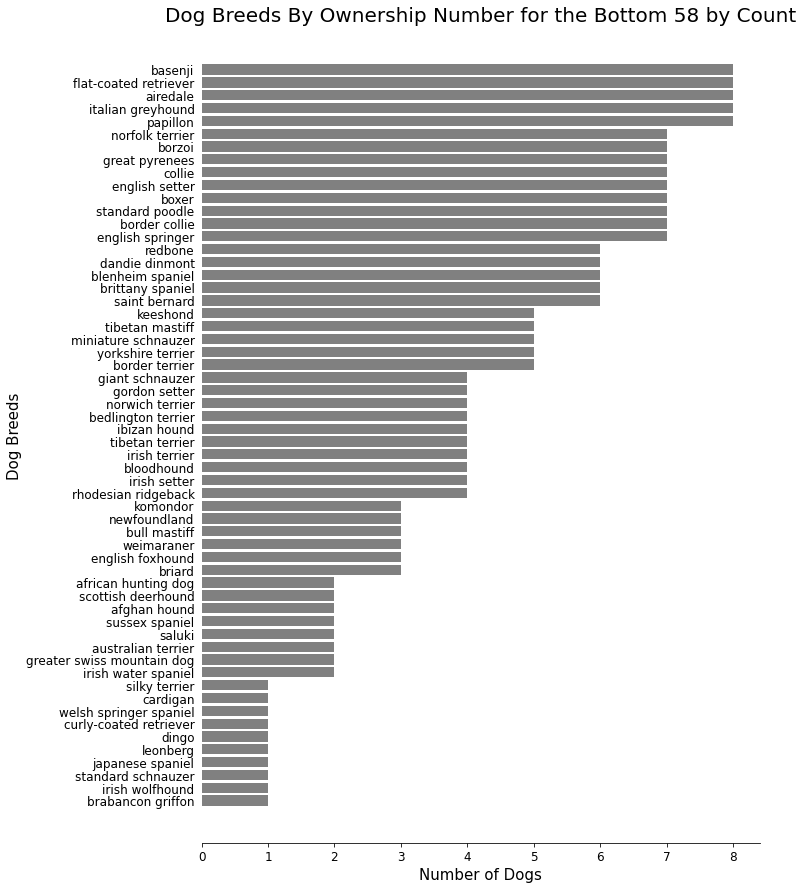

In [300]:
#plot dog_breeds by count in a horizontal bar plot for bottom 58  by count
plt.figure(figsize=(10, 15))
plt.barh(dog_breeds_counts['dog_breeds'][40:], dog_breeds_counts['counts'][40:], color='grey')
plt.gca().invert_yaxis()
plt.title('Dog Breeds By Ownership Number for the Bottom 58 by Count', fontsize=20)
plt.xlabel('Number of Dogs', fontsize = 15)
plt.ylabel('Dog Breeds', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, None)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()

> The rarest dogs in this list include:


89.  silky terrier	1
90.	cardigan	1
91.	welsh springer spaniel	1
92.	curly-coated retriever	1
93.	dingo	1
94.	leonberg	1
95.	japanese spaniel	1
96.	standard schnauzer	1
97. irish wolfhound	1
98.	brabancon griffon	1

### Exploratory Data Analysis and Visualization:
2. How did dog ratings vary with counts among different breeds?

In [301]:
# create new table that has dog_ratings (rounded off) and dog_breeds_counts table
#first view
master_df.groupby('dog_breeds').mean()['rating_numerator'][:5]
#create new lists 
dog_breed_list = master_df.groupby('dog_breeds').mean().index.tolist()
dog_breed_mean_ratings = master_df.groupby('dog_breeds').mean()['rating_numerator'].tolist()
dog_breed_counts = master_df.groupby('dog_breeds').count()['rating_numerator'].tolist()

In [302]:
obj_d = {'dog_breeds': dog_breed_list, 'counts': dog_breed_counts, 'mean_ratings': dog_breed_mean_ratings}
df_meanratings_counts = pd.DataFrame(data=obj_d)

In [303]:
#round off the mean_ratings values
df_meanratings_counts['mean_ratings'] = df_meanratings_counts['mean_ratings'].round(0).astype(int)
#drop 'None' column
df_meanratings_counts.drop(labels=0, axis=0, inplace=True)


In [304]:
df_meanratings_counts.head(7)

,dog_breeds,counts,mean_ratings
1,afghan hound,2,8
2,african hunting dog,2,8
3,airedale,8,9
4,american staffordshire terrier,9,11
5,australian terrier,2,12
6,basenji,8,11
7,basset,10,11


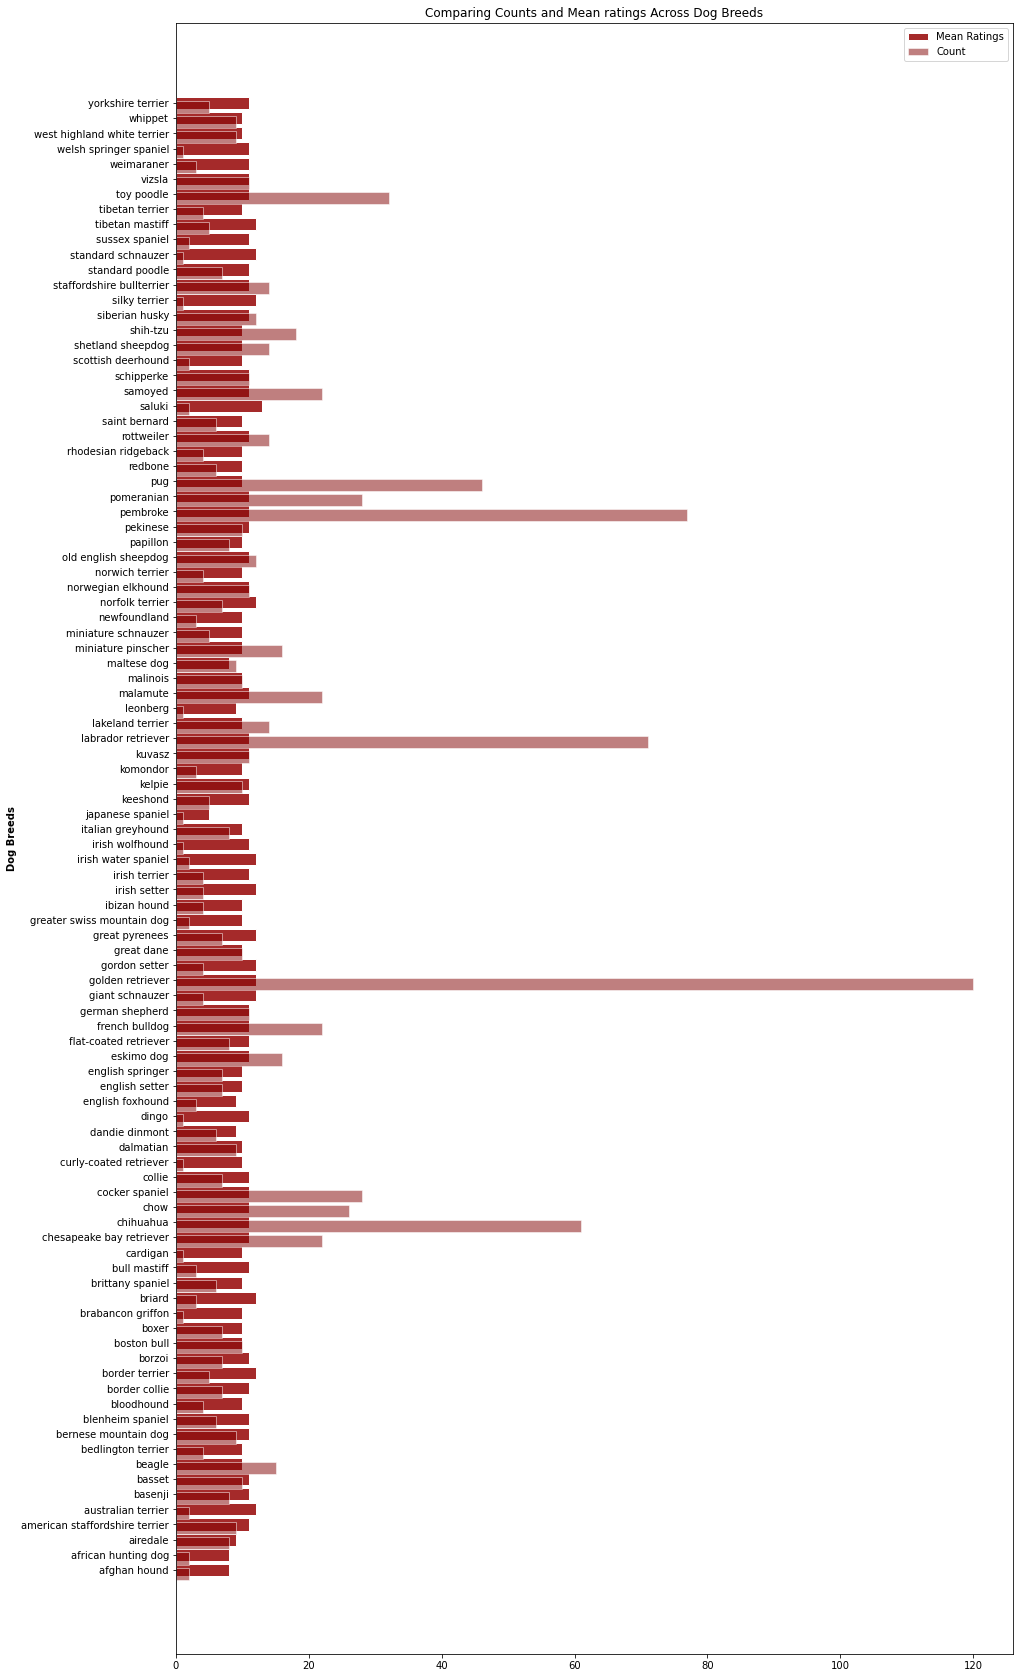

In [305]:
#plot a grouped horizontal barchart to account for counts and mean_ratings
bar_width = 0.25
plt.figure(figsize=(15, 30))
bars1 = df_meanratings_counts['counts']
bars2 = df_meanratings_counts['mean_ratings']
#set position of bars on y axis
r1 = np.arange(len(bars1))
r2 = [y+bar_width for y in r1]
#make the plot
plt.barh(r2, bars2, color='brown', edgecolor='white', label='Mean Ratings')
plt.barh(r1, bars1, color='maroon', edgecolor='white', label='Count', alpha=0.5)
plt.title('Comparing Counts and Mean ratings Across Dog Breeds')
#add yticks in the middle of group bars
plt.ylabel('Dog Breeds', fontweight='bold')
plt.yticks([r+bar_width for r in range(len(bars1))], df_meanratings_counts['dog_breeds'])
#create legend and show graphic
plt.legend()
plt.show()

**From this Visualization:**
> 1. Breeds that were more commonly owned generally received higher mean ratings.
> 2. However, many less common breeds like the norfolk terrier, saluki, and toy poodle,etc were also very highly rated.

In [306]:
df_meanratings_counts.mean_ratings.value_counts()

11    42
10    34
12    13
9      4
8      3
5      1
13     1
Name: mean_ratings, dtype: int64

> Also, only 1 dog breed had mean ratings of 13

> 42 breeds had mean ratings of 11

### Exploratory Data Analysis and Visualization:
3. Was there any difference in dog ratings based on dog owners' internet device?

In [307]:
master_df.groupby('source').mean()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
source,,,,,,
Twitter Web Client,6.861849e+17,9.578947,10.0,1.157895,1969.473684,4293.263158
Twitter for iPhone,7.360074e+17,10.557911,10.0,1.186980,2829.205148,8118.877366


In [308]:
#create dataframe
obj_d = {'source': master_df.groupby('source').mean().index.tolist(), 'Mean Ratings': master_df.groupby('source').mean().rating_numerator.tolist()}
device_df = pd.DataFrame(data=obj_d)
device_df

,source,Mean Ratings
0,Twitter Web Client,9.578947
1,Twitter for iPhone,10.557911


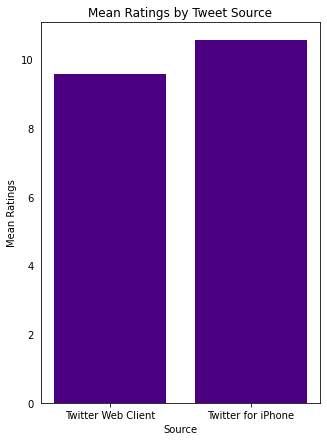

In [309]:
#plot a bar chart
plt.figure(figsize=(5, 7))
plt.bar(device_df['source'], device_df['Mean Ratings'], color='indigo')

plt.title('Mean Ratings by Tweet Source', fontsize=12)
plt.xlabel('Source', fontsize = 10)
plt.ylabel('Mean Ratings', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlim(0, None)
plt.tick_params(left=False)
#sns.despine(left=True)
plt.show()

- Dog Pictures from Twitter for Iphone had higher mean ratings compared to those from Twitter Web Client

### Exploratory Data Analysis and Visualization:
4. How did the mean dog ratings vary with the passsage of time?

In [310]:
#plot graph based on quarters of the year:
#create column 'quarter' from timestamp
master_df['quarter'] = pd.PeriodIndex(master_df['timestamp'], freq='Q')
master_df['quarter_string'] = master_df['quarter'].astype('str')
master_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,dog_breeds,length_of_text,retweet_count,favorite_count,quarter,quarter_string
0,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,"[0, 121]",4328,25461,2017Q3,2017Q3
1,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador retriever,"[0, 79]",8964,42908,2017Q3,2017Q3


In [311]:
#groupby quarter
master_df.groupby('quarter').mean()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
quarter,,,,,,
2015Q4,6.724133e+17,9.371111,10.0,1.055556,1111.653333,2536.333333
2016Q1,6.973923e+17,10.206107,10.0,1.141221,1494.866412,4094.194656
2016Q2,7.328994e+17,10.465116,10.0,1.209302,2251.209302,6306.837209
2016Q3,7.636206e+17,10.849057,10.0,1.314465,3472.333333,8278.157233
2016Q4,7.984572e+17,11.898438,10.0,1.296875,5218.187500,12897.828125
2017Q1,8.291060e+17,12.357143,10.0,1.377551,6105.857143,17108.571429
2017Q2,8.641243e+17,12.415730,10.0,1.325843,6279.865169,24187.471910
2017Q3,8.867456e+17,12.529412,10.0,1.264706,7109.647059,30565.911765


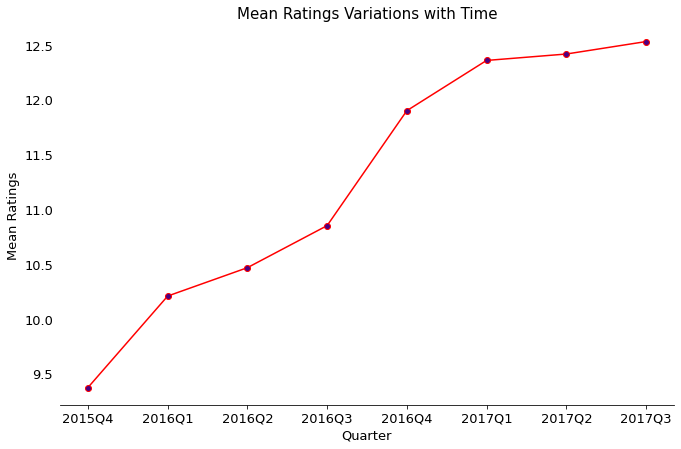

In [312]:
#plot a line chart
plt.figure(figsize=(11, 7))
plt.plot(master_df.groupby('quarter').mean().index.astype('str').tolist(), master_df.groupby('quarter').mean()['rating_numerator'].tolist(), color='red', marker='o', mfc='indigo')

plt.title('Mean Ratings Variations with Time', fontsize=15)
plt.xlabel('Quarter', fontsize = 13)
plt.ylabel('Mean Ratings', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.xlim(0, None)
plt.tick_params(left=False)
sns.despine(left=True)
plt.show()



- Within the span of 3 years and from quarter to quarter, mean ratings from WeRateDogs climbed significantly. 

### Exploratory Data Analysis and Visualization:
5. Were dogs that had other dogs nearby i.e doggo, puppo, floofer and pupper more likely to be rated higher?

In [323]:
# enssure dog_stages is str type
master_df['dog_stages'] = master_df['dog_stages'].astype('str')

In [329]:
master_df['dog_stages']

0                 nan
1                 nan
2                 nan
3                 nan
4                 nan
5                 nan
6                 nan
7                 nan
8                 nan
9                 nan
10                nan
11                nan
12                nan
13                nan
14                nan
15                nan
16                nan
17                nan
18                nan
19             pupper
20                nan
21                nan
22                nan
23                nan
24                nan
25                nan
26                nan
27                nan
28                nan
29             pupper
30                nan
31                nan
32                nan
33                nan
34                nan
35                nan
36                nan
37                nan
38                nan
39                nan
40                nan
41                nan
42                nan
43                nan
44             pupper
45        

In [333]:
#create new column 'has_family' that returns true if dog has at least one 'relative' or friend and false otherwise
master_df['has_family'] = master_df.dog_stages.apply(lambda x: 1 if len(x) > 3 else 0)

In [334]:
master_df.has_family.value_counts()

0    1137
1     212
Name: has_family, dtype: int64

In [ ]:
#set to categorical data
master_df['has_family'] = master_df['has_family'].astype('category')

In [ ]:
master_df.groupby('has_family').count()

> ONLY 212 DOGS HAVE AT LEAST ONE DOG FAMILY MEMBER OR FRIEND

In [336]:
# group by has_family; get mean
master_df.groupby('has_family').mean()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
has_family,,,,,,
0,7.342603e+17,10.477573,10.0,1.176781,2715.441513,7906.817942
1,7.401877e+17,10.933962,10.0,1.240566,3367.391509,8836.198113


In [337]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype        
---  ------              --------------  -----        
 0   tweet_id            1349 non-null   int64        
 1   timestamp           1349 non-null   object       
 2   source              1340 non-null   object       
 3   text                1349 non-null   object       
 4   expanded_urls       1349 non-null   object       
 5   rating_numerator    1349 non-null   int64        
 6   rating_denominator  1349 non-null   int64        
 7   name                957 non-null    object       
 8   dog_stages          1349 non-null   object       
 9   jpg_url             1349 non-null   object       
 10  img_num             1349 non-null   int64        
 11  dog_breeds          1349 non-null   object       
 12  length_of_text      1349 non-null   object       
 13  retweet_count       1349 non-null   int64        
 14  favorite

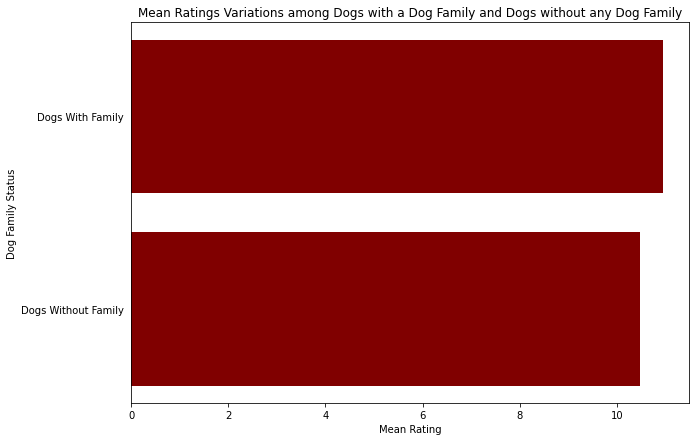

In [338]:
#plot a bar chart
plt.figure(figsize=(10, 7))
tick_values = master_df.groupby('has_family').mean().index.tolist()
plt.barh(master_df.groupby('has_family').mean().index.tolist(), master_df.groupby('has_family').mean()['rating_numerator'].tolist(), color='maroon')

plt.title('Mean Ratings Variations among Dogs with a Dog Family and Dogs without any Dog Family', fontsize=12)
plt.xlabel('Mean Rating', fontsize = 10)
plt.ylabel('Dog Family Status', fontsize=10)
plt.yticks(ticks=tick_values, labels = ['Dogs Without Family', 'Dogs With Family'])
plt.xticks(fontsize=10)
#plt.xlim(0, None)
plt.tick_params(left=False)
#sns.despine(left=True)
plt.show()

> Dogs with at least a Dog Family Member had a slightly higher average rating compared to dogs without any Dog Family member

### Exploratory Data Analysis and Visualization:
6. How did ratings vary with favorite count and retweet counts among dog tweets? Any suggestion of a correlation? 

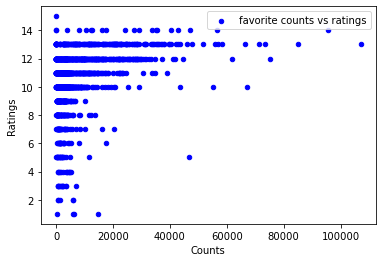

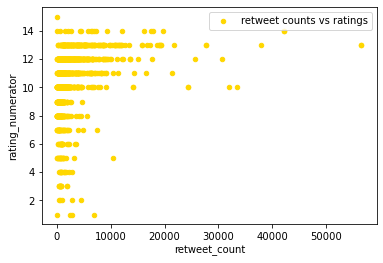

In [339]:
#make single scatterplots with ratings on the y axis and both favorite counts and retweet counts on the x axis
ax = master_df.plot(kind='scatter', x='favorite_count', y='rating_numerator', label='favorite counts vs ratings', color='blue')
master_df.plot(kind='scatter', x='retweet_count', y='rating_numerator', label='retweet counts vs ratings', color='gold')
ax.set_xlabel('Counts')
ax.set_ylabel('Ratings')
plt.show()

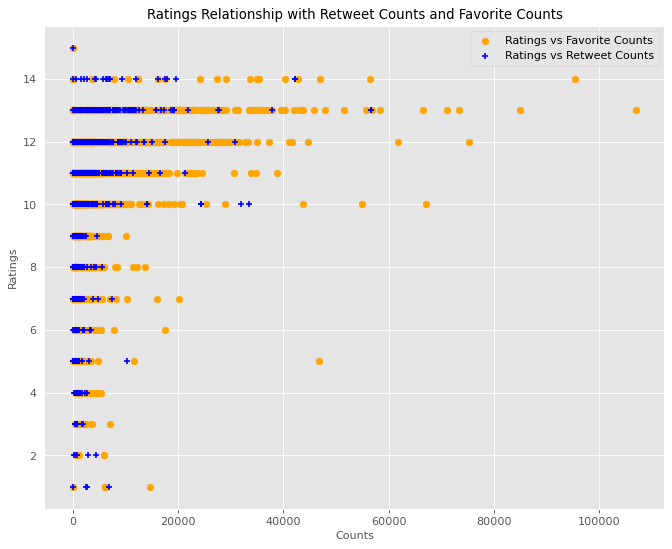

In [340]:
#make a multi scatterplot with ratings on the y axis and both favorite counts and retweet counts on the x axis
plt.figure(figsize=(10,8), dpi=80)
plt.style.use('ggplot')
plt.title('Ratings Relationship with Retweet Counts and Favorite Counts', fontsize=12)
plt.ylabel('Ratings', fontsize = 10)
plt.xlabel('Counts', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

#plt.xlim(0, None)
plt.tick_params(left=False)
#sns.despine(left=True)
plt.scatter(x=master_df['favorite_count'], y=master_df['rating_numerator'], color='orange', marker='o')
plt.scatter(x=master_df['retweet_count'], y=master_df['rating_numerator'], color='blue', marker='+')
plt.legend(['Ratings vs Favorite Counts', 'Ratings vs Retweet Counts'])
plt.show()

- Dogs with higher ratings had their tweets marked as favorites more times than lower-rated dogs. The same trend was seen with the number of retweets.

<a id='conclusion'></a>
## Conclusion:

> **Limitations**: No statistical tests were done in this project, therefore these findings do not prove causation. However, there are several instances of correlation.

- The **golden retriever** is by far the most 'owned' dog (count=120) in this list. 
The rarest dogs in this list include the silky terrier among others

- Breeds that were more commonly owned generally received higher mean ratings. However, many less common breeds like the norfolk terrier, saluki, and toy poodle,etc were also very highly rated.

- Dog Pictures from Twitter for Iphone had higher mean ratings compared to those from Twitter Web Client

- Within the span of 3 years and from quarter to quarter, mean ratings from WeRateDogs climbed significantly. 

- Dogs with at least a Dog Family Member had a slightly higher average rating compared to dogs without any Dog Family member.

- Dogs with higher ratings had their tweets marked as favorites more times than lower-rated dogs. The same trend was seen with the number of retweets.
